In [33]:
import pandas as pd
import numpy as np
import lasio
import os
%matplotlib inline


import matplotlib
import sys
sys.path.append('./logspliceui')
from helper import *
from Filters import *
# matplotlib.use('Agg')
import matplotlib.pyplot as plt 




In [5]:
folder=r'D:\Ameyem Office\Projects\Cairn\W1\LAS\\'
cols=[]
# las=[]
# log.df().sort_values([log.keys()[dindx]])
# log.keys()
files=os.listdir(folder)[:]
files
filetypes={'comp':['COMPOSITE'],'suite':['SUITE'],'sonic':['SonicVISION'],'res':['VISION']}
# separate filetypes on tvd
tvd_files=[]
nontvd_files=[]
for f in files:
    if 'TVD' in f:
        tvd_files.append(f)
    else:
        nontvd_files.append(f)
# type_wise_tvd_files=segregate_files(tvd_files,filetypes)
# type_wise_nontvd_files=segregate_files(nontvd_files,filetypes)
# type_wise_nontvd_files
def get_txtdict(file,delimiter=','):
    with open(file,'r') as f:
        lines=f.readlines()
        file_dict={}
        for l in lines:
            [key,val]=l.split('=')
            file_dict[key.strip()]=[v.strip() for v in val.split(delimiter)]
        return file_dict
def get_loggingtype(file_str,logging_type_dict):
    filewords=multi_split(file_str,delims=['_','-','.'])
    for keyword in logging_type_dict['LWD']:
        if keyword in file_str:
            return 'LWD'
    return 'WL'
def get_category(log_mnemo,cat_dict):
#     filewords=multi_split(file_str,delims=['_','-','.'])
    for key in cat_dict:
        if log_mnemo in cat_dict[key]:
            return key
    return 'NA'

# log_categoty_dict
def split_strofarray(strArray,delim):
    resarray=[]
    for s in strArray:
        resarray.extend(s.split(delim))
    return resarray
def multi_split(str_,delims=['_','-','.']):
    str_=[str_]
    for d in delims:
        str_=split_strofarray(str_,d)
    return str_
    
logging_type_dict=get_txtdict(folder+'../../lwd_wireline_differentiators.txt')
log_categoty_dict=get_txtdict(folder+'../../mnemonics.txt',delimiter=' ')

lwd_files=[]
wireline_files=[]
logging_type_dict,log_categoty_dict
for f in nontvd_files:
    if get_loggingtype(f,logging_type_dict)=='LWD':
        lwd_files.append(f)
    else:
        wireline_files.append(f)
lwd_files,wireline_files

(['W1_12in_ASCII_RM_APWD_Time_Corrected.las',
  'W1_12in_SonicVISION-APWD_RM_ASCII_DCS-Processed.las',
  'W1_12in_VISION_APWD_MD_RM_LAS.las',
  'W1_17in_ASCII_RM_PWD.las',
  'W1_17in_VISIONRes-APWD_RM_ASCII_600m-1591m.las',
  'W1_6in_ASCII_RM_PWD.LAS',
  'W1_6in_VISIONResistivity-APWD_RM_MD_ASCII.las',
  'W1_8in_SonicVISION-APWD_RM_ASCII_DCS-Processed.las',
  'W1_8in_VISION-APWD_RM_MD_ASCII.las'],
 ['W1_SUITE1_COMPOSITE.las',
  'W1_SUITE1_ZDL_CN_HIRES.las',
  'W1_SUITE2_COMPOSITE.las',
  'W1_SUITE2_ZDL_CN_HIRES.las',
  'W1_SUITE4_COMPOSITE.las',
  'W1_SUITE4_ZDL_CN_HIRES.las'])

In [6]:
log_categoty_dict.keys(),logging_type_dict.keys()
mylas=lasio.read(folder+lwd_files[0])

D:\adiarun\Anaconda3\lib\site-packages\lasio\las.py:228: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  arr[arr == null] = np.nan


In [7]:
np.array(dir(mylas)),np.size(mylas.values())

(array(['__class__', '__delattr__', '__dict__', '__dir__', '__doc__',
        '__eq__', '__format__', '__ge__', '__getattribute__',
        '__getitem__', '__gt__', '__hash__', '__init__',
        '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__',
        '__new__', '__reduce__', '__reduce_ex__', '__repr__',
        '__setattr__', '__setitem__', '__sizeof__', '__str__',
        '__subclasshook__', '__weakref__', '_text', 'add_curve',
        'add_curve_raw', 'append_curve', 'append_curve_item', 'curves',
        'curvesdict', 'data', 'delete_curve', 'depth_ft', 'depth_m', 'df',
        'encoding', 'get_curve', 'header', 'index', 'index_unit',
        'insert_curve', 'insert_curve_item', 'items', 'iteritems',
        'iterkeys', 'itervalues', 'json', 'keys', 'match_raw_section',
        'metadata', 'other', 'params', 'raw_sections', 'read', 'sections',
        'set_data', 'set_data_from_df', 'to_csv', 'to_excel', 'values',
        'version', 'well', 'write'], dtype='<U17')

In [10]:
# las=[]
# for f in lwd_files:
#     las.append(lasio.read(folder+f))
for l in las:
    print(np.size(l.values()))
# lkeys=[]
# for l in las:
# #     print('**************************************')
#     lkeys.extend(l.keys() )

292680
21826
384192
154056
188732
233280
20196
3660
46276


In [9]:
las=[]
for f in lwd_files:
    las.append(lasio.read(folder+f))
for l in las:
    print(l[-1].__repr__)

D:\adiarun\Anaconda3\lib\site-packages\lasio\las.py:228: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  arr[arr == null] = np.nan


<method-wrapper '__repr__' of numpy.ndarray object at 0x000001EC6C27C4E0>
<method-wrapper '__repr__' of numpy.ndarray object at 0x000001EC6C27CF30>
<method-wrapper '__repr__' of numpy.ndarray object at 0x000001EC6C28D080>
<method-wrapper '__repr__' of numpy.ndarray object at 0x000001EC6C29A9E0>
<method-wrapper '__repr__' of numpy.ndarray object at 0x000001EC6C2A3940>
<method-wrapper '__repr__' of numpy.ndarray object at 0x000001EC6C2BC210>
<method-wrapper '__repr__' of numpy.ndarray object at 0x000001EC6C2C9D50>
<method-wrapper '__repr__' of numpy.ndarray object at 0x000001EC6C2DA350>
<method-wrapper '__repr__' of numpy.ndarray object at 0x000001EC6C2E91C0>


In [20]:
logging_type_dict=get_txtdict(folder+'../../lwd_wireline_differentiators.txt')
log_categoty_dict=get_txtdict(folder+'../../mnemonics.txt',delimiter=' ')
#     for key in l.keys():
#         print('{} :  :{}'.format(key,get_descr(key,las)))
#     log_plot4(las[-1],4180,4220)
#     plt.show()
# las
ulkeys=np.unique(lkeys)
ulkeys, counts = np.unique(lkeys, return_counts=True)
for key,c in zip(ulkeys,counts):
    print('{} : {} :{} : {}'.format(key,c,get_category(key,log_categoty_dict),get_descr(key,las)))
# for key in ulkeys:
    

NameError: name 'lkeys' is not defined

In [12]:
projectFolder=r'D:\Ameyem Office\Projects\Cairn\W1\\'
log_bundle=np.load(projectFolder+'proc_logs_bundle.npy')


(22.194599999999998, 87.66866999999999)
(19.6048, 86.26112)


./logspliceui\Filters.py:31: RuntimeWarning: invalid value encountered in greater_equal
  arr[arr>=clipranges[1]]=np.nan


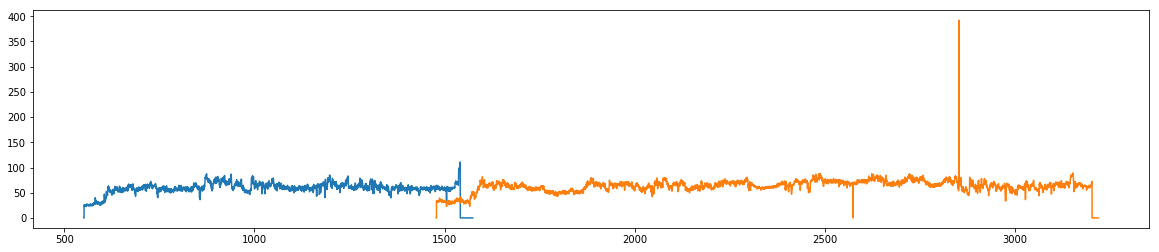

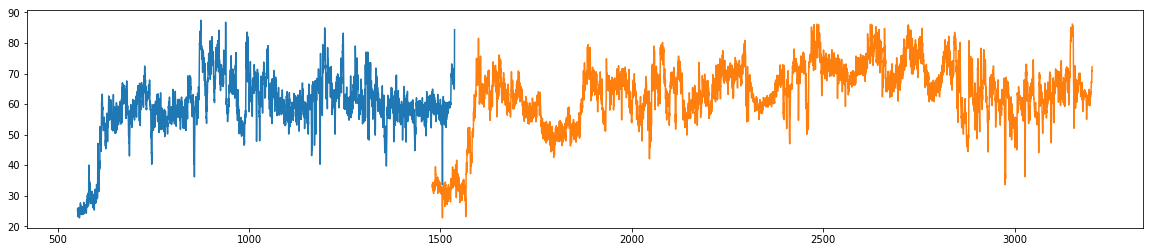

In [21]:
logname='GR';depthcol_name='DEPTH'
fig,ax=plt.subplots(figsize=(20,4))
for lb in log_bundle:
    plt.plot(lb[depthcol_name],lb[logname])
    
fig,ax=plt.subplots(figsize=(20,4))
flt_arrs=[]
for lb in log_bundle:
    flt_arrs.append(hist_filter(lb[logname].copy(),n_big_patches=1,hist_bins=100))
    
    plt.plot(lb[depthcol_name],flt_arrs[-1])    


In [22]:
import sys
# sys.path.append('D:\SoftwareWebApps\Python\pyQt\LogSpliceUI\\')
from LateralCorr import mean_norm,get_delay


Loading modules...


dt =  0.07600000000002183
dt =  0.07600000000002183
3.8000000000010914


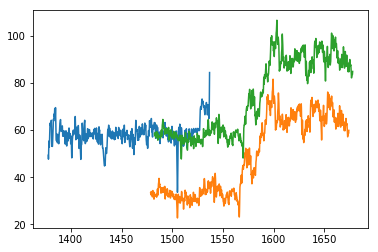

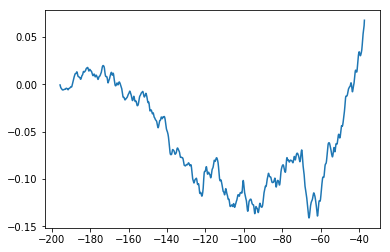

In [35]:
%matplotlib inline
# for lb in log_bundle:
#     flt_arrs.append(order_filter(lb[logname].copy(),n_big_patches=1,hist_patches=100))
    
    
#     plt.plot(lb[depthcol_name],flt_arrs[-1])
    
def common_depth(log_bundle):
    if len(log_bundle)>2:
        print('Please input a bundle with two sets of logs...')
        return
    dranges=[]
    depthcol_name='DEPTH'
    dointersect=False
    for lb in log_bundle:
        dranges.append([lb[depthcol_name].min(),lb[depthcol_name].max()])
    for mx in max(dranges):
        for mn in min(dranges):
            if not dointersect:
                dointersect=mx<mn   
    if dointersect:
        return [min(max(dranges)),max(min(dranges))]
    else:
        return [np.nan, np.nan]
        
def getCurveWRange(deptharr,dataarr,drange):
    indxs= (deptharr>=drange[0]) & (deptharr<=drange[1])
    return deptharr[indxs],dataarr[indxs]
    
# drange=common_depth(log_bundle)
ma=[]
expand_range=100
for lb,fa in zip(log_bundle,flt_arrs):
    drange=common_depth(log_bundle[0:2])
    drange=np.array(drange)+np.array([-expand_range, expand_range])
    d,a=getCurveWRange(lb[depthcol_name],fa,drange)
    dt=d[1]-d[0]
    print('dt = ',dt)
    ma.append(mean_norm(a))
    plt.plot(d,a)
delay,corr=get_delay(ma[0],ma[1],dt)
print(delay)
plt.plot(d+delay,a+25)
fg=plt.figure()
plt.plot(corr[0],corr[1])
# plt.show()

D:\adiarun\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\adiarun\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  6.,   3.,   3.,   1.,   3.,   3.,   6.,   8.,  23.,  33.,  52.,
         82.,  76.,  86., 118., 122., 102., 120.,  98.,  61.,  49.,  31.,
         40.,  29.,  20.,  20.,  17.,  13.,  15.,  14.,   9.,  17.,  16.,
         21.,  27.,  34.,  31.,  57.,  69.,  93., 107., 129., 186., 178.,
        193., 188., 218., 177., 176., 220., 256., 281., 261., 347., 401.,
        446., 442., 496., 543., 534., 539., 629., 589., 630., 655., 623.,
        675., 679., 710., 780., 720., 664., 612., 608., 612., 574., 523.,
        505., 526., 373., 418., 374., 304., 233., 190., 171., 149., 172.,
        144., 144., 125., 128.,  80.,  78.,  66.,  49.,  36.,  35.,  19.,
         13.]),
 array([22.732  , 23.36634, 24.00068, 24.63502, 25.26936, 25.9037 ,
        26.53804, 27.17238, 27.80672, 28.44106, 29.0754 , 29.70974,
        30.34408, 30.97842, 31.61276, 32.2471 , 32.88144, 33.51578,
        34.15012, 34.78446, 35.4188 , 36.05314, 36.68748, 37.32182,
        37.95616, 38.5905 , 39.22484, 39.85918

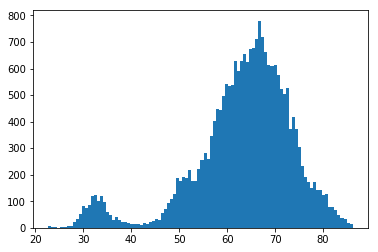

In [64]:
def find_baselines():
    pass
# plt.plot(flt_arrs[1])
plt.hist(flt_arrs[1],100)

In [37]:
# np.ma(flt_arrs[1])

from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
np.array(series)
series=flt_arrs[1]

result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
pyplot.show()

In [61]:
from flex import FlexXY
logname='GR';depthcol_name='DEPTH'
# logXY=np.append(log_bundle[0][depthcol_name].T,order_filter(log_bundle[0][logname].copy(),n_big_patches=1,hist_patches=100).T,axis=1)
logXY=np.column_stack((log_bundle[0][depthcol_name],order_filter(log_bundle[0][logname].copy(),n_big_patches=1,hist_patches=100)))

flex_xy=FlexXY(logXY[~np.isnan(logXY[:,1]),:])
flex_xy.resampleXY(logXY[:,1])

D:\adiarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in greater_equal


IndexError: index -1 is out of bounds for axis 0 with size 0

In [38]:
FlexXY.resample()

# result = seasonal_decompose(series, model='additive', freq=1)
# result.plot()
# pyplot.show()

ValueError: This function does not handle missing values

In [10]:

norm_blog=mean_norm(self.log_col)#[0:800]
self.normlogs[logname]=norm_blog
dist2look=100
delay_estimation,lag_corr= get_delay(self.norm_gamma,norm_blog,dt,corrtype='abs',dist2look=dist2look)


NameError: name 'self' is not defined

In [11]:
def get_indx_of_cont_patches(a):
    arr=np.multiply(a[0]!=0,a[1][1:])
    lenarr=arr.__len__()
    indx_of_cont_patch_ends=[]
    lend=0
    rend=0
    prev_val=0
    for i in range(1,lenarr):

        if (arr[i]!=0) & (arr[i-1]==0 ):
    #         indx_of_cont_patch_ends.append  ([lend,rend])
            lend=i

        elif (arr[i]==0) & (arr[i-1]!=0) :
            rend=i-1
            indx_of_cont_patch_ends.append  ([lend,rend])
        elif (arr[i]!=0) & (arr[i-1]!=0) & (i==lenarr-1) :
            rend=i
            indx_of_cont_patch_ends.append  ([lend,rend])

    return indx_of_cont_patch_ends   
def get_vals_of_cont_patches(a):
#     
    vals_of_cont_patch_ends=[]
    for lrindx in get_indx_of_cont_patches(a):
         vals_of_cont_patch_ends.append(a[1][lrindx])
    return np.array(vals_of_cont_patch_ends )
def clip_array_nans(arr,clipranges):
    arr[arr<=clipranges[0]]=np.nan
    arr[arr>=clipranges[1]]=np.nan
    return arr
def order_filter(arr,n_big_patches=2,hist_patches=100):
    if n_big_patches<1:
        n_big_patches=0
    a=np.histogram(arr[~np.isnan(arr)],hist_patches)
    hist_step=a[1][1]-a[1][0]
    vals_of_cont_patch_ends=get_vals_of_cont_patches(a)
    patch_sort_indxs=np.argsort(np.diff(vals_of_cont_patch_ends).ravel())
    distnct_ranges=vals_of_cont_patch_ends[patch_sort_indxs[-n_big_patches:]].ravel()
    clipranges=distnct_ranges.min(),distnct_ranges.max()
#     clipranges=vals_of_cont_patch_ends[order][0]-hist_step/2,vals_of_cont_patch_ends[-order][1]+hist_step/2
    return clip_array_nans(arr,clipranges)

In [12]:
# np.histogram(lb[logname],100)
n_big_patches=1
arr=lb[logname].copy()
plt.plot(arr)
a=np.histogram(arr[~np.isnan(arr)],100)
# hist_step=a[1][1]-a[1][0]
vals_of_cont_patch_ends=get_vals_of_cont_patches(a)
patch_sort_indxs=np.argsort(np.diff(vals_of_cont_patch_ends).ravel())
distnct_ranges=vals_of_cont_patch_ends[patch_sort_indxs[-n_big_patches:]].ravel()
clipranges=distnct_ranges.min(),distnct_ranges.max()
flt_arr=clip_array_nans(arr,clipranges)
flt_arr=order_filter(arr,n_big_patches=1)
plt.plot(flt_arr)

NameError: name 'lb' is not defined

In [13]:
arr=np.multiply(a[0]!=0,a[1][1:])
arr

NameError: name 'a' is not defined

In [226]:
# a,get_vals_of_cont_patches(a)

lenarr=arr.__len__()
indx_of_cont_patch_ends=[]
lend=0
rend=0
prev_val=0
for i in range(1,lenarr):
    print(i,end=', ')

    if (arr[i]!=0) & (arr[i-1]==0 ):
#         indx_of_cont_patch_ends.append  ([lend,rend])
        lend=i

    elif (arr[i]==0) & (arr[i-1]!=0) :
        rend=i-1
        indx_of_cont_patch_ends.append  ([lend,rend])
    elif (arr[i]!=0) & (arr[i-1]!=0) & (i==lenarr-1) :
        rend=i
        indx_of_cont_patch_ends.append  ([lend,rend]) 
print(lenarr)
a[0],indx_of_cont_patch_ends

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, yes
100


(array([ 236,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,  171,    0,    1,    0,    0,    1,    0,    0,    0,    0,
           0,    1,    0,    0,    0,    0,    0,    0,    0,    1,    0,
           0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,
           0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    1,
           0,    0,    0,  780,  316, 1014, 1859, 5293, 5378, 2226,  934,
         308,  538,  474,  277,  448,  441,  341,  165,  143,  264,  135,
         138,  143,  139,   68,   52,   39,   63,   81,   51,   42,   35,
          63,   26,   12,   14,   12,   30,   31,   19,   10,    5,    5,
          30], dtype=int64),
 [[0, 0],
  [12, 12],
  [14, 14],
  [17, 17],
  [23, 23],
  [31, 31],
  [40, 40],
  [48, 48],
  [54, 54],
  [58, 99]])

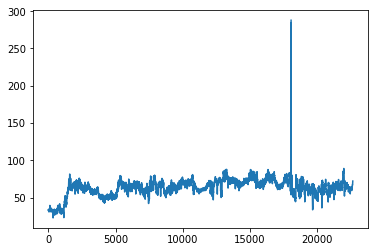

In [174]:
arr=lb[logname].copy()
order=2
# 
a=np.histogram(arr[~np.isnan(arr)],100)
hist_step=a[1][1]-a[1][0]
vals_of_cont_patch_ends=get_vals_of_cont_patches(a)
clipranges=vals_of_cont_patch_ends[order-1][0]-hist_step/2,vals_of_cont_patch_ends[-order][1]+hist_step/2
# np.histogram(arr,10)
clipranges,vals_of_cont_patch_ends


D:\adiarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in greater_equal


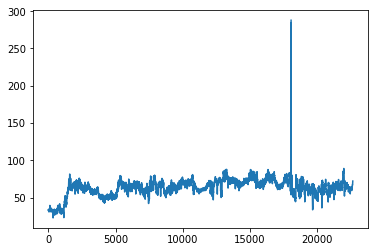

In [155]:
arr=lb[logname].copy()
flt_arr=clip_array_nans(arr,clipranges)
# flt_arr=order_filter(arr,order=2)
plt.plot(flt_arr)

In [65]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy
import peakutils




ModuleNotFoundError: No module named 'peakutils'

In [66]:
!pip install peakutils

  Running setup.py bdist_wheel for peakutils: started
  Running setup.py bdist_wheel for peakutils: finished with status 'done'
  Stored in directory: C:\Users\adiarun\AppData\Local\pip\Cache\wheels\47\a5\7e\f1f31e3a04014971676dcbd1ec1becb97e047a10f57d9a531b
Successfully built peakutils


  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x00000238ACE71358>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',)': /simple/peakutils/
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
